In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
def gerar_dataframe(qtd=500_00, seed=42): 
   
    np.random.seed(seed)

    id_funcionario = np.arange(1, qtd + 1)
    idade = np.random.randint(18, 60, size=qtd)
    genero = np.random.choice(['Masculino', 'Feminino', 'Prefiro não informar'], size=qtd, p=[0.45, 0.35, 0.20])
    estado_civil = np.random.choice(['Solteiro(a)', 'Casado(a)', 'Divorciado(a)', 'Prefiro não informar'], size=qtd)
    escolaridade = np.random.choice(['Ensino Médio', 'Graduação', 'Pós', 'Mestrado', 'Doutorado', 'Prefiro não informar'], size=qtd)
    cor_raca = np.random.choice(['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Prefiro não informar'], size=qtd)
    filhos = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd)
    nacionalidade = np.random.choice(['Brasileira', 'Estrangeira', 'Prefiro não informar'], size=qtd)
    naturalidade = np.random.choice(['SP', 'RJ', 'MG', 'Outros', 'Prefiro não informar'], size=qtd)
    tipo_moradia = np.random.choice(['Alugada', 'Própria', 'Compartilhada', 'Prefiro não informar'], size=qtd)
    pcd = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.05, 0.95])
    estado_uf = np.random.choice(['SP', 'RJ', 'MG', 'BA', 'RS', 'CE', 'DF', 'PE', 'AM', 'MT', 'PR', 'AL', 'SC', ' ', 'Não informado'], size=qtd)

    area_formacao = np.random.choice([
        'Cientista de Dados/Data Scientist', 'Desenvolvedor', 'Engenharia de Software', 'Marketing',
        'RH', 'Product Manager/PO', 'Analista de Dados/Data Analyst', 'Administrativo', 'Financeiro',
        'Vendas', 'Pesquisa e Desenvolvimento', 'Engenharia de Dados/Data Engineer', 'UX/UI',
        'Suporte Técnico', 'Prefiro não informar'], size=qtd)

    departamento = np.random.choice(['Vendas', 'RH', 'TI', 'Pesquisa', 'Negócio', 'Administrativo'], size=qtd)
    cargo = np.random.choice([
        'Especialista', 'Gestor?', 'Cargo como Gestor', 'Tempo de experiência na área',
        'Gerente', 'Senior', 'Pleno', 'Junior', 'Estagiário', 'Prefiro não informar'], size=qtd)

    envolvimento = np.random.randint(1, 5, size=qtd)
    anos_empresa = np.random.randint(0, 41, size=qtd)
    promocoes = np.random.randint(0, 6, size=qtd)
    salario = np.random.randint(1500, 25000, size=qtd)
    faixa_salarial = pd.cut(salario, bins=[0, 3000, 7000, 12000, 18000, np.inf],
                            labels=['Muito baixa', 'Baixa', 'Média', 'Alta', 'Muito alta'])
    aumento = np.random.randint(0, 30, size=qtd)
    nivel_acao = np.random.randint(0, 4, size=qtd)

    sat_trabalho = np.random.randint(1, 6, size=qtd)
    sat_ambiente = np.random.randint(1, 6, size=qtd)
    sat_relacionamento = np.random.randint(1, 6, size=qtd)
    sat_beneficios = np.random.randint(1, 6, size=qtd)

    hora_extra = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.3, 0.7])
    equilibrio = np.random.randint(1, 5, size=qtd)
    viagem = np.random.choice(['Nunca', 'Raramente', 'Frequentemente'], size=qtd)
    distancia = np.random.randint(1, 50, size=qtd)
    avaliacao = np.random.choice([3, 4], size=qtd, p=[0.9, 0.1])
    treinamentos = np.random.randint(0, 6, size=qtd)

    pretende_mudar = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd, p=[0.3, 0.6, 0.1])
    futuro_empresa = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd)
    expectativa_crescimento = np.random.choice(['Alta', 'Média', 'Baixa', 'Prefiro não informar'], size=qtd)

    motivo_mudanca = np.random.choice(['Salário', 'Home Office', 'Ambiente de trabalho', 'Desenvolvimento profissional', 'Mudança de cidade', 'Não responder'], size=qtd)
    afastamentos = np.random.randint(0, 4, size=qtd)
    atestados = np.random.randint(0, 10, size=qtd)

    saiu_empresa = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.16, 0.84])
    saiu_empresa = pd.Categorical(saiu_empresa, categories=['Sim', 'Não'], ordered=True)

    df = pd.DataFrame({
        'ID Funcionário': id_funcionario,
        'Idade': idade,
        'Gênero': genero,
        'Estado Civil': estado_civil,
        'Escolaridade': escolaridade,
        'Cor/Raça': cor_raca,
        'Filhos': filhos,
        'Nacionalidade': nacionalidade,
        'Naturalidade': naturalidade,
        'Tipo de Moradia': tipo_moradia,
        'PCD': pcd,
        'Estado/UF': estado_uf,
        'Área de Formação': area_formacao,
        'Departamento': departamento,
        'Cargo': cargo,
        'Envolvimento no Trabalho': envolvimento,
        'Anos na Empresa': anos_empresa,
        'Número de Promoções': promocoes,
        'Salário Mensal': salario,
        'Faixa Salarial': faixa_salarial,
        'Aumento Salarial (%)': aumento,
        'Nível de Opção de Ação': nivel_acao,
        'Satisfação no Trabalho': sat_trabalho,
        'Satisfação com o Ambiente de Trabalho': sat_ambiente,
        'Satisfação com Relacionamento no Trabalho': sat_relacionamento,
        'Satisfação com os Benefícios': sat_beneficios,
        'Hora Extra': hora_extra,
        'Equilíbrio Vida-Trabalho': equilibrio,
        'Viagem a Negócios': viagem,
        'Distância Casa (km)': distancia,
        'Avaliação de Desempenho (1-5)': avaliacao,
        'Treinamentos por Ano': treinamentos,
        'Pretende Mudar de Emprego?': pretende_mudar,
        'Você se vê na empresa em 5 anos?': futuro_empresa,
        'Expectativa de Crescimento': expectativa_crescimento,
        'Motivo da Mudança de Emprego': motivo_mudanca,
        'Histórico de Afastamentos': afastamentos,
        'Número de Atestados': atestados,
        'Saiu da Empresa?': saiu_empresa
    })

    colunas_nulas = ['Salário Mensal', 'Área de Formação', 'Satisfação no Trabalho', 'Anos na Empresa']
    for coluna in colunas_nulas:
        qtd_nulo = int(qtd * 0.05)
        indices_nulo = np.random.choice(df.index, qtd_nulo, replace=False)
        df.loc[indices_nulo, coluna] = np.nan

    colunas_numericas = [
        'Salário Mensal', 'Anos na Empresa', 'Idade', 'Envolvimento no Trabalho',
        'Aumento Salarial (%)', 'Nível de Opção de Ação', 'Satisfação no Trabalho',
        'Satisfação com o Ambiente de Trabalho', 'Satisfação com Relacionamento no Trabalho',
        'Equilíbrio Vida-Trabalho', 'Distância Casa (km)', 'Avaliação de Desempenho (1-5)',
        'Treinamentos por Ano'
    ]
    for coluna in colunas_numericas:
        qtd_neg = int(qtd * 0.01)
        indices_neg = np.random.choice(df.index, qtd_neg, replace=False)
        df.loc[indices_neg, coluna] *= -1

    variacoes = {
        'Desenvolvedor': ['Desenvolvedor ', 'Dev', 'desenvolvedor'],
        'Cientista de Dados/Data Scientist': ['Cientista de Dados', 'Data Scientist', 'DS']
    }
    for original, alteracoes in variacoes.items():
        indices = df[df['Área de Formação'] == original].sample(frac=0.1, replace=False, random_state=seed).index
        if not indices.empty:
            df.loc[indices, 'Área de Formação'] = np.random.choice(alteracoes, size=len(indices))

    indices_uf = df.sample(frac=0.005, replace=False, random_state=seed).index
    df.loc[indices_uf, 'Estado/UF'] = 'XX'

    indices_outlier_salario = df.sample(frac=0.001, replace=False, random_state=seed).index
    df.loc[indices_outlier_salario, 'Salário Mensal'] = np.random.randint(50000, 100000, size=len(indices_outlier_salario))

  
    jovens = df[df['Idade'] < 30]
    indices_jovens = jovens.sample(frac=0.001, replace=False, random_state=seed).index
    df.loc[indices_jovens, 'Anos na Empresa'] = df.loc[indices_jovens, 'Idade'] + np.random.randint(5, 15, size=len(indices_jovens))

   
    indices_cargo = df.sample(frac=0.005, replace=False, random_state=seed).index
    indices_validos = indices_cargo[df.loc[indices_cargo, 'Anos na Empresa'].notna() & (df.loc[indices_cargo, 'Anos na Empresa'] >= 0)]
    df.loc[indices_validos, 'Cargo'] = 'Tempo: ' + (df.loc[indices_validos, 'Anos na Empresa'] + np.random.randint(1, 5, size=len(indices_validos))).astype(str)

    return df


In [4]:
df_funcionarios = gerar_dataframe(qtd=500_00, seed=42)

In [5]:
df_funcionarios.head(150)


,ID Funcionário,Idade,Gênero,Estado Civil,Escolaridade,Cor/Raça,Filhos,Nacionalidade,Naturalidade,Tipo de Moradia,...,Distância Casa (km),Avaliação de Desempenho (1-5),Treinamentos por Ano,Pretende Mudar de Emprego?,Você se vê na empresa em 5 anos?,Expectativa de Crescimento,Motivo da Mudança de Emprego,Histórico de Afastamentos,Número de Atestados,Saiu da Empresa?
0,1,56,Feminino,Prefiro não informar,Prefiro não informar,Prefiro não informar,Sim,Estrangeira,SP,Própria,...,47,3,0,Não,Não,Média,Desenvolvimento profissional,3,8,Sim
1,2,46,Masculino,Divorciado(a),Pós,Branca,Não,Brasileira,RJ,Compartilhada,...,31,3,3,Sim,Prefiro não informar,Prefiro não informar,Home Office,2,1,Sim
2,3,32,Feminino,Solteiro(a),Doutorado,Indígena,Prefiro não informar,Brasileira,SP,Prefiro não informar,...,36,3,2,Sim,Prefiro não informar,Prefiro não informar,Não responder,0,5,Sim
3,4,25,Feminino,Divorciado(a),Graduação,Branca,Não,Brasileira,MG,Compartilhada,...,1,3,4,Não,Não,Média,Home Office,3,8,Não
4,5,38,Masculino,Casado(a),Mestrado,Indígena,Sim,Estrangeira,MG,Prefiro não informar,...,30,3,3,Não,Sim,Média,Ambiente de trabalho,3,9,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,45,Masculino,Prefiro não informar,Doutorado,Parda,Não,Brasileira,MG,Alugada,...,25,3,4,Não,Prefiro não informar,Baixa,Não responder,3,9,Não
146,147,19,Masculino,Prefiro não informar,Mestrado,Amarela,Não,Brasileira,MG,Alugada,...,26,3,0,Não,Prefiro não informar,Alta,Home Office,0,2,Sim
147,148,59,Masculino,Casado(a),Ensino Médio,Amarela,Sim,Estrangeira,RJ,Alugada,...,32,3,3,Sim,Prefiro não informar,Prefiro não informar,Não responder,0,4,Não
148,149,-23,Masculino,Casado(a),Prefiro não informar,Preta,Sim,Estrangeira,MG,Prefiro não informar,...,46,3,-2,Não,Sim,Prefiro não informar,Home Office,1,1,Não


In [6]:
display(df_funcionarios.columns)

Index(['ID Funcionário', 'Idade', 'Gênero', 'Estado Civil', 'Escolaridade',
       'Cor/Raça', 'Filhos', 'Nacionalidade', 'Naturalidade',
       'Tipo de Moradia', 'PCD', 'Estado/UF', 'Área de Formação',
       'Departamento', 'Cargo', 'Envolvimento no Trabalho', 'Anos na Empresa',
       'Número de Promoções', 'Salário Mensal', 'Faixa Salarial',
       'Aumento Salarial (%)', 'Nível de Opção de Ação',
       'Satisfação no Trabalho', 'Satisfação com o Ambiente de Trabalho',
       'Satisfação com Relacionamento no Trabalho',
       'Satisfação com os Benefícios', 'Hora Extra',
       'Equilíbrio Vida-Trabalho', 'Viagem a Negócios', 'Distância Casa (km)',
       'Avaliação de Desempenho (1-5)', 'Treinamentos por Ano',
       'Pretende Mudar de Emprego?', 'Você se vê na empresa em 5 anos?',
       'Expectativa de Crescimento', 'Motivo da Mudança de Emprego',
       'Histórico de Afastamentos', 'Número de Atestados', 'Saiu da Empresa?'],
      dtype='object')

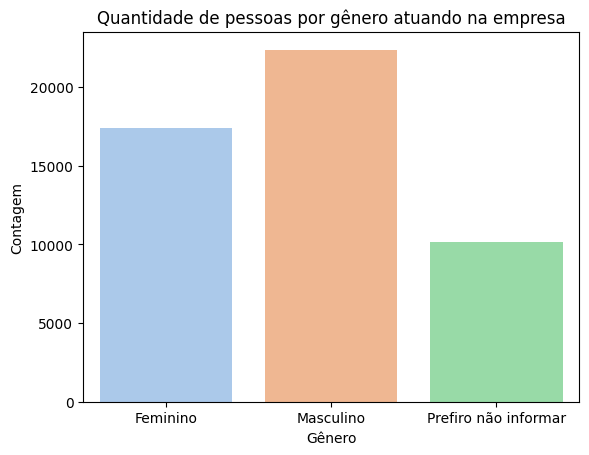

In [34]:
df_funcionarios['Gênero_plot'] = df_funcionarios.apply(get_genero, axis=1)

plt.figure()
sns.countplot(data=df_funcionarios, x="Gênero_plot", hue="Gênero_plot", palette="pastel", legend=False)
plt.title("Quantidade de pessoas por gênero atuando na empresa")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.show()

C:\Users\taili\AppData\Local\Temp\ipykernel_29284\2008232638.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




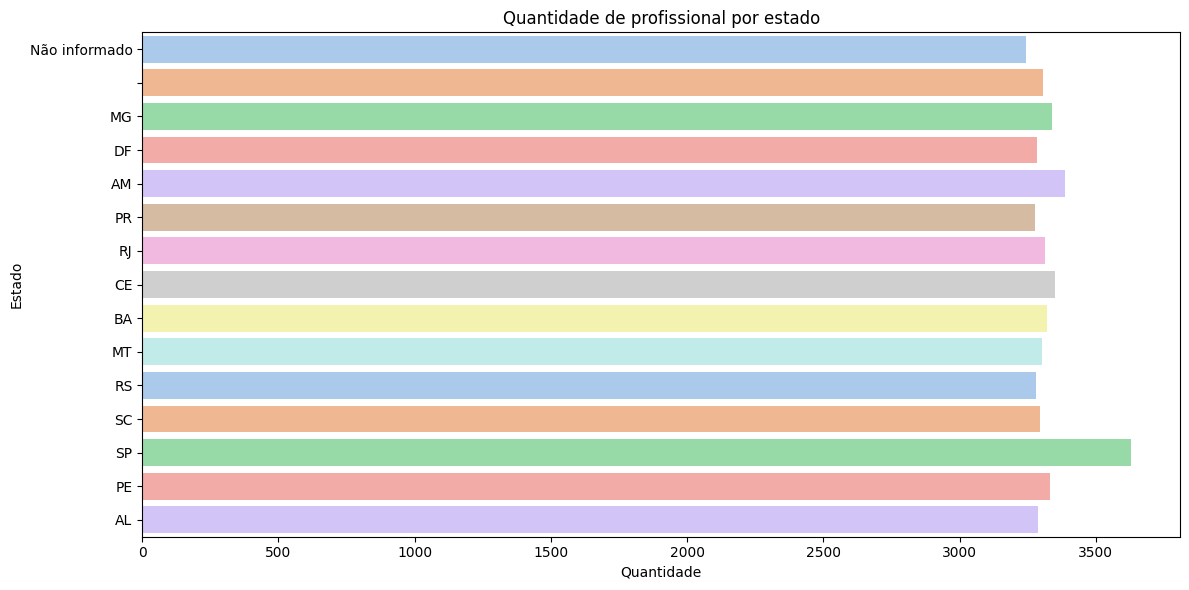

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_funcionarios, y="Estado/UF", palette="pastel")
plt.title("Quantidade de profissional por estado")
plt.xlabel("Quantidade")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()

Tratamento de Valores Nulos


Mapa de valores nulos:


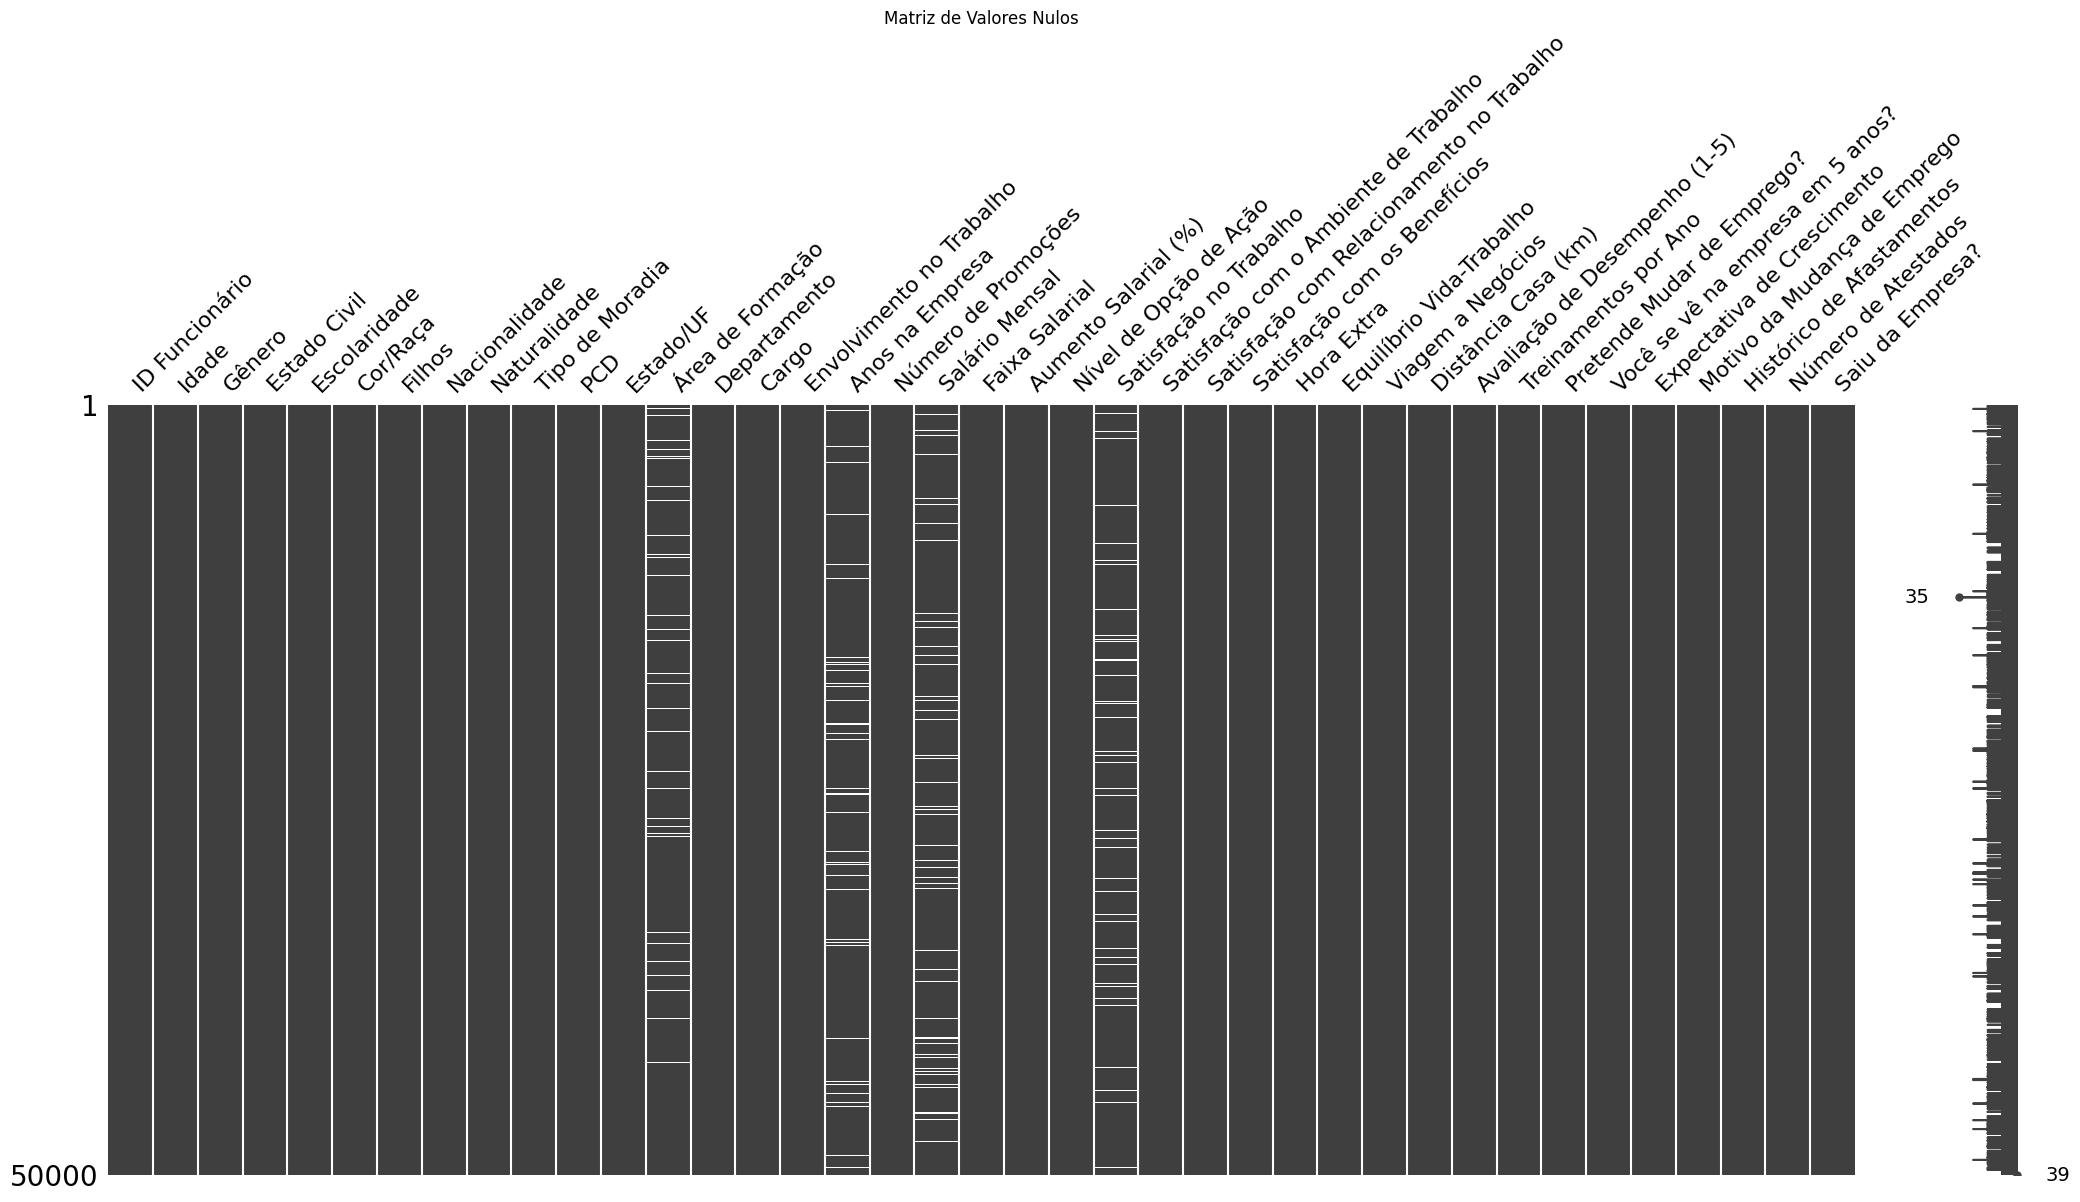


Contagem de valores nulos por coluna:

Área de Formação                             2500
Satisfação no Trabalho                       2500
Anos na Empresa                              2498
Salário Mensal                               2496
ID Funcionário                                  0
Idade                                           0
Gênero                                          0
Filhos                                          0
Cor/Raça                                        0
Escolaridade                                    0
Estado Civil                                    0
PCD                                             0
Nacionalidade                                   0
Tipo de Moradia                                 0
Naturalidade                                    0
Cargo                                           0
Departamento                                    0
Estado/UF                                       0
Envolvimento no Trabalho                        0
Número de 

In [7]:
# Visualização de valores nulos

print("\nMapa de valores nulos:")
msno.matrix(df_funcionarios)
plt.title('Matriz de Valores Nulos')
plt.show()

print("\nContagem de valores nulos por coluna:\n")
print(df_funcionarios.isnull().sum().sort_values(ascending=False))

In [8]:
# Imputação para colunas numéricas

df_funcionarios['Salário Mensal'].fillna(df_funcionarios['Salário Mensal'].median(), inplace=True)

C:\Users\taili\AppData\Local\Temp\ipykernel_29284\2271400505.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_funcionarios['Salário Mensal'].fillna(df_funcionarios['Salário Mensal'].median(), inplace=True)


In [9]:
# Imputando mediana

df_funcionarios['Anos na Empresa'].fillna(df_funcionarios['Anos na Empresa'].median(), inplace=True)

C:\Users\taili\AppData\Local\Temp\ipykernel_29284\3191291079.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_funcionarios['Anos na Empresa'].fillna(df_funcionarios['Anos na Empresa'].median(), inplace=True)


In [10]:
# Imputação para colunas categóricas

df_funcionarios['Área de Formação'].fillna(df_funcionarios['Área de Formação'].mode()[0], inplace=True)
df_funcionarios['Satisfação no Trabalho'].fillna(df_funcionarios['Satisfação no Trabalho'].mode()[0], inplace=True)

C:\Users\taili\AppData\Local\Temp\ipykernel_29284\65409876.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_funcionarios['Área de Formação'].fillna(df_funcionarios['Área de Formação'].mode()[0], inplace=True)
C:\Users\taili\AppData\Local\Temp\ipykernel_29284\65409876.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [11]:
# Verificar nulos após a imputação

print("\nContagem de valores nulos após imputação:")
print(df_funcionarios.isnull().sum().sort_values(ascending=False))


Contagem de valores nulos após imputação:
ID Funcionário                               0
Idade                                        0
Gênero                                       0
Estado Civil                                 0
Escolaridade                                 0
Cor/Raça                                     0
Filhos                                       0
Nacionalidade                                0
Naturalidade                                 0
Tipo de Moradia                              0
PCD                                          0
Estado/UF                                    0
Área de Formação                             0
Departamento                                 0
Cargo                                        0
Envolvimento no Trabalho                     0
Anos na Empresa                              0
Número de Promoções                          0
Salário Mensal                               0
Faixa Salarial                               0
Aumento Salarial 

Tratamento de Valores Negativos e Outliers

In [12]:
# Tratar valores negativos

numeric_cols_to_check_neg = ['Salário Mensal', 'Anos na Empresa', 'Idade', 'NívelCargo',
                             'Envolvimento Trabalho', 'Aumento Salarial', 'Nível Opção Ação',
                             'Satisfaçã Trabalho', 'Satisfação Ambiente', 'Satisfação Relacionamento',
                             'Equilíbrio Vida Trabalho', 'Distância de Casa', 'Avaliação de sempenho',
                             'Treinamentos Ano']

for col in numeric_cols_to_check_neg:
    if col in df_funcionarios.columns:
        df_funcionarios[col] = np.where(df_funcionarios[col] < 0, np.nan, df_funcionarios[col])
        
        # Depois de substituir por NaN imputar com a mediana
        
        df_funcionarios[col].fillna(df_funcionarios[col].median(), inplace=True)

C:\Users\taili\AppData\Local\Temp\ipykernel_29284\3204074715.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_funcionarios[col].fillna(df_funcionarios[col].median(), inplace=True)
C:\Users\taili\AppData\Local\Temp\ipykernel_29284\3204074715.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [13]:
# Limitação por IQR para Salário Mensal

Q1 = df_funcionarios['Salário Mensal'].quantile(0.25)
Q3 = df_funcionarios['Salário Mensal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Substituir outliers por limites

df_funcionarios['Salário Mensal'] = np.where(df_funcionarios['Salário Mensal'] > upper_bound, upper_bound,
                               np.where(df_funcionarios['Salário Mensal'] < lower_bound, lower_bound, df_funcionarios['Salário Mensal']))

print("\nEstatísticas Descritivas Salário Mensal após tratamento de Outliers:\n")

print(df_funcionarios['Salário Mensal'].describe())


Estatísticas Descritivas Salário Mensal após tratamento de Outliers:

count    50000.000000
mean     13291.996820
std       6626.214669
min       1500.000000
25%       7765.000000
50%      13163.500000
75%      18852.000000
max      35482.500000
Name: Salário Mensal, dtype: float64


In [15]:
if df_funcionarios['Salário Mensal'].notna().any():
	df_funcionarios['Salário Mensal'] = df_funcionarios['Salário Mensal'].fillna(df_funcionarios['Salário Mensal'].mean())

if df_funcionarios['Anos na Empresa'].notna().any():
	df_funcionarios['Anos na Empresa'] = df_funcionarios['Anos na Empresa'].fillna(df_funcionarios['Anos na Empresa'].median())

moda_area = df_funcionarios['Área de Formação'].mode()
if not moda_area.empty:
	df_funcionarios['Área de Formação'] = df_funcionarios['Área de Formação'].fillna(moda_area[0])

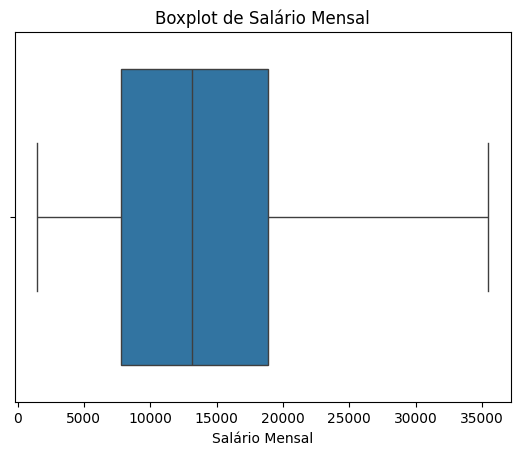

In [16]:
sns.boxplot(data=df_funcionarios, x='Salário Mensal')
plt.title("Boxplot de Salário Mensal")
plt.show()

# Remover outliers acima de 3 desvios padrão
media = df_funcionarios['Salário Mensal'].mean()
desvio = df_funcionarios['Salário Mensal'].std()
limite_superior = media + 3 * desvio
df_funcionarios = df_funcionarios[df_funcionarios['Salário Mensal'] <= limite_superior]

In [38]:
# Calcular a média de salário por idade
salario_por_idade = df_funcionarios.groupby('Idade')['Salário Mensal'].mean()

fig = px.line( salario_por_idade.reset_index(), x = "Idade", y = "Salário Mensal", title = "Média de salário por idade", markers = True)
fig.show()

In [39]:
df_funcionarios['Salário Mensal'].describe()

count    49950.000000
mean     13269.784104
std       6592.211902
min       1500.000000
25%       7758.250000
50%      13163.500000
75%      18826.000000
max      24999.000000
Name: Salário Mensal, dtype: float64

 Tratamento de valores inválidos

In [19]:
# Tratamento de Inconsistências em Colunas Categóricas

df_funcionarios['Área de Formação'] = df_funcionarios['Área de Formação'].replace({
    'Desenvolvedor ': 'Desenvolvedor',
    'Dev': 'Desenvolvedor',
    'desenvolvedor': 'Desenvolvedor',
    'Cientista de Dados': 'Cientista de Dados/Data Scientist',
    'Data Scientist': 'Cientista de Dados/Data Scientist',
    'DS': 'Cientista de Dados/Data Scientist'
})

# Substituir 'XX' por NaN na coluna correta
df_funcionarios['Estado/UF'] = df_funcionarios['Estado/UF'].replace('XX', np.nan)

# Imputar com a moda
df_funcionarios['Estado/UF'].fillna(df_funcionarios['Estado/UF'].mode()[0], inplace=True)

print("\nContagem de valores únicos em Área de Formação após padronização:\n")
print(df_funcionarios['Área de Formação'].value_counts())

print("\nContagem de valores únicos em Estado/UF após tratamento:\n")
print(df_funcionarios['Estado/UF'].value_counts())



Contagem de valores únicos em Área de Formação após padronização:

Área de Formação
Marketing                            5773
Administrativo                       3258
UX/UI                                3226
Engenharia de Dados/Data Engineer    3218
Suporte Técnico                      3197
RH                                   3181
Pesquisa e Desenvolvimento           3169
Vendas                               3163
Cientista de Dados/Data Scientist    3134
Prefiro não informar                 3130
Financeiro                           3125
Desenvolvedor                        3114
Engenharia de Software               3101
Analista de Dados/Data Analyst       3084
Product Manager/PO                   3077
Name: count, dtype: int64

Contagem de valores únicos em Estado/UF após tratamento:

Estado/UF
SP               3628
AM               3386
CE               3352
MG               3338
PE               3333
BA               3320
RJ               3312
                 3306
MT            

C:\Users\taili\AppData\Local\Temp\ipykernel_29284\638374018.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_funcionarios['Estado/UF'].fillna(df_funcionarios['Estado/UF'].mode()[0], inplace=True)


In [20]:
# Transformações - Criar coluna Idade Categoria

bins_idade = [0, 25, 35, 45, 55, np.inf]
labels_idade = ['Jovem', 'Adulto Jovem', 'Adulto', 'Adulto Maduro', 'Idoso']
df_funcionarios['Idade Categoria'] = pd.cut(df_funcionarios['Idade'], bins=bins_idade, labels=labels_idade, right=False)

In [21]:
df_funcionarios.columns

Index(['ID Funcionário', 'Idade', 'Gênero', 'Estado Civil', 'Escolaridade',
       'Cor/Raça', 'Filhos', 'Nacionalidade', 'Naturalidade',
       'Tipo de Moradia', 'PCD', 'Estado/UF', 'Área de Formação',
       'Departamento', 'Cargo', 'Envolvimento no Trabalho', 'Anos na Empresa',
       'Número de Promoções', 'Salário Mensal', 'Faixa Salarial',
       'Aumento Salarial (%)', 'Nível de Opção de Ação',
       'Satisfação no Trabalho', 'Satisfação com o Ambiente de Trabalho',
       'Satisfação com Relacionamento no Trabalho',
       'Satisfação com os Benefícios', 'Hora Extra',
       'Equilíbrio Vida-Trabalho', 'Viagem a Negócios', 'Distância Casa (km)',
       'Avaliação de Desempenho (1-5)', 'Treinamentos por Ano',
       'Pretende Mudar de Emprego?', 'Você se vê na empresa em 5 anos?',
       'Expectativa de Crescimento', 'Motivo da Mudança de Emprego',
       'Histórico de Afastamentos', 'Número de Atestados', 'Saiu da Empresa?',
       'Idade Categoria'],
      dtype='object')

In [22]:
# Transformar colunas categóricas para análise/modelagem 

df_funcionarios = pd.get_dummies(df_funcionarios, columns=['Gênero'], prefix='Genero', dummy_na=False)

In [23]:
# Label Encoding - 'Saiu da Empresa?'

le = LabelEncoder()
df_funcionarios['SaiuDaEmpresa_Encoded'] = le.fit_transform(df_funcionarios['Saiu da Empresa?'])

print("\nPrimeiras 5 linhas após Engenharia de Features:")
print(df_funcionarios.head())



Primeiras 5 linhas após Engenharia de Features:
   ID Funcionário  Idade          Estado Civil          Escolaridade  \
0               1   56.0  Prefiro não informar  Prefiro não informar   
1               2   46.0         Divorciado(a)                   Pós   
2               3   32.0           Solteiro(a)             Doutorado   
3               4   25.0         Divorciado(a)             Graduação   
4               5   38.0             Casado(a)              Mestrado   

               Cor/Raça                Filhos Nacionalidade Naturalidade  \
0  Prefiro não informar                   Sim   Estrangeira           SP   
1                Branca                   Não    Brasileira           RJ   
2              Indígena  Prefiro não informar    Brasileira           SP   
3                Branca                   Não    Brasileira           MG   
4              Indígena                   Sim   Estrangeira           MG   

        Tipo de Moradia  PCD  ... Expectativa de Crescimento 

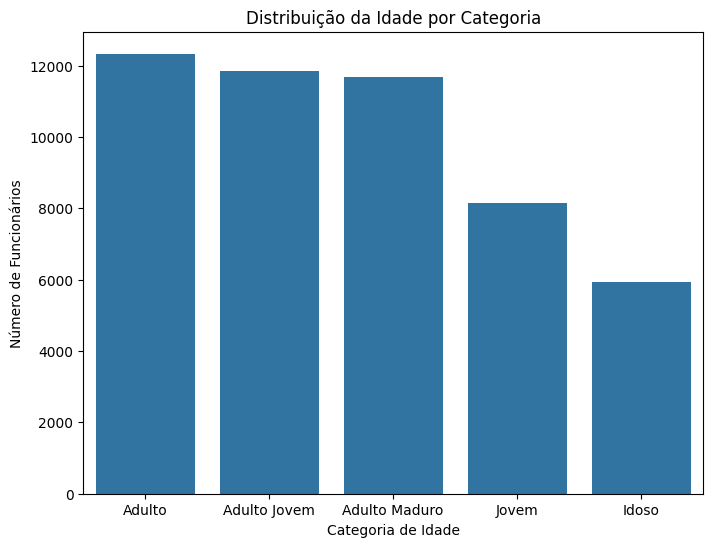

In [24]:
# Dados tratados

plt.figure(figsize=(8, 6))
sns.countplot(data=df_funcionarios, x='Idade Categoria', order=df_funcionarios['Idade Categoria'].value_counts().index)
plt.title('Distribuição da Idade por Categoria')
plt.xlabel('Categoria de Idade')
plt.ylabel('Número de Funcionários')
plt.show()

C:\Users\taili\AppData\Local\Temp\ipykernel_29284\4156626352.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_funcionarios[col].fillna(mediana, inplace=True)
C:\Users\taili\AppData\Local\Temp\ipykernel_29284\4156626352.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

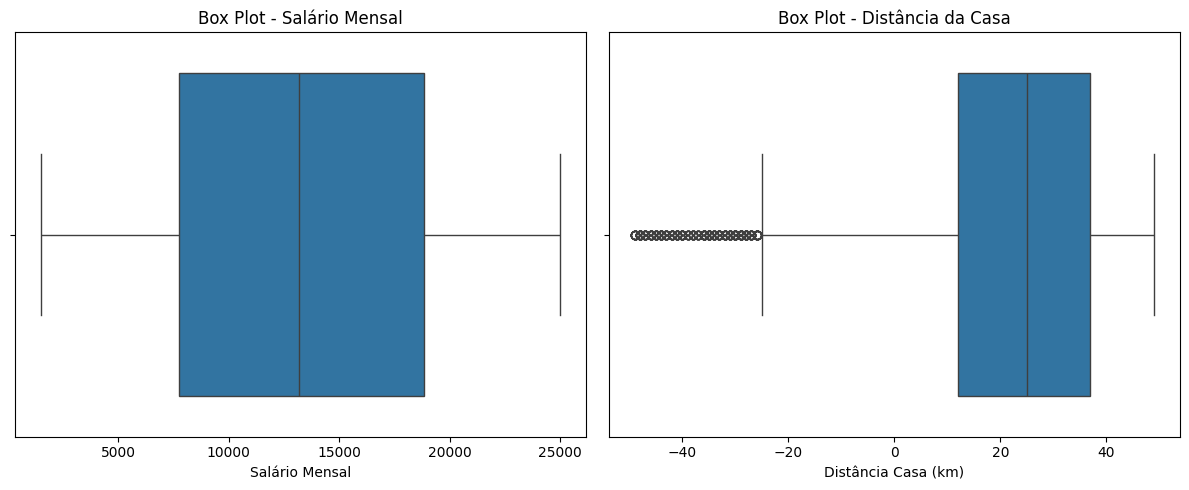

In [25]:
colunas = ['Salário Mensal', 'Distância Casa (km)']

for col in colunas:
    if col in df_funcionarios.columns:
        if df_funcionarios[col].dropna().empty:
            print(f"A coluna '{col}' está vazia ou só tem NaNs.")
        elif not np.issubdtype(df_funcionarios[col].dtype, np.number):
            print(f"A coluna '{col}' não é numérica.")
        else:
            mediana = df_funcionarios[col].median()
            df_funcionarios[col].fillna(mediana, inplace=True)
    else:
        print(f"A coluna '{col}' não existe no DataFrame.")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
if df_funcionarios['Salário Mensal'].dropna().empty:
    plt.text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', fontsize=12)
    plt.title('Box Plot - Salário Mensal')
    plt.axis('off')
else:
    sns.boxplot(x=df_funcionarios['Salário Mensal'])
    plt.title('Box Plot - Salário Mensal')

plt.subplot(1, 2, 2)
if df_funcionarios['Distância Casa (km)'].dropna().empty:
    plt.text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', fontsize=12)
    plt.title('Box Plot - Distância da Casa')
    plt.axis('off')
else:
    sns.boxplot(x=df_funcionarios['Distância Casa (km)'])
    plt.title('Box Plot - Distância da Casa')

plt.tight_layout()
plt.show()

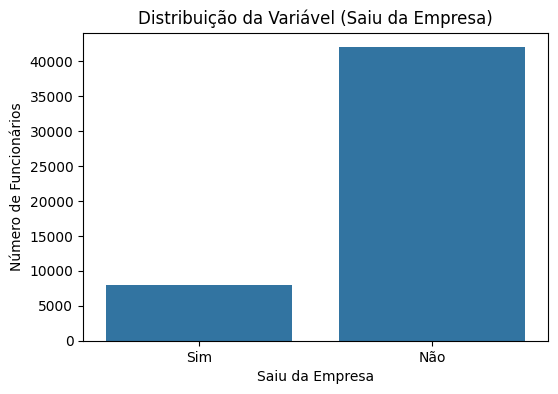

In [26]:
# Target de distribuição de Saída da Empresa

plt.figure(figsize=(6, 4))
sns.countplot(data=df_funcionarios, x='Saiu da Empresa?')
plt.title('Distribuição da Variável (Saiu da Empresa)')
plt.xlabel('Saiu da Empresa')
plt.ylabel('Número de Funcionários')
plt.show()


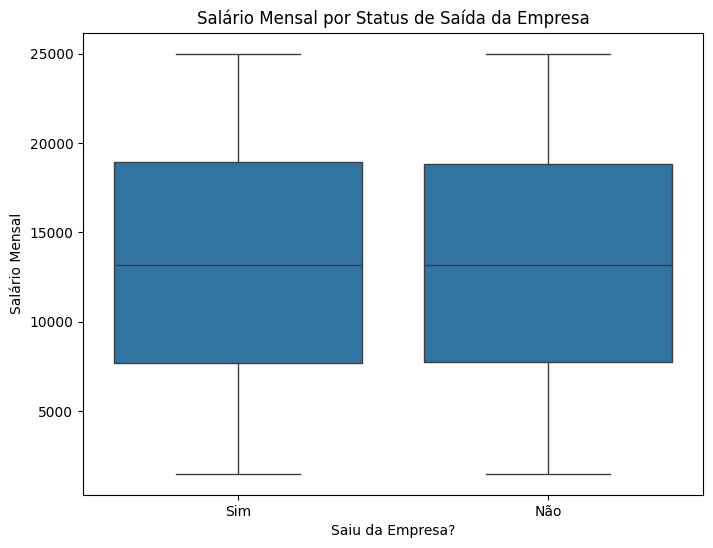

In [27]:
# Relação entre Salário Mensal e Saiu da Empresa

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_funcionarios, x='Saiu da Empresa?', y='Salário Mensal')
plt.title('Salário Mensal por Status de Saída da Empresa')
plt.xlabel('Saiu da Empresa?')
plt.ylabel('Salário Mensal')
plt.show()

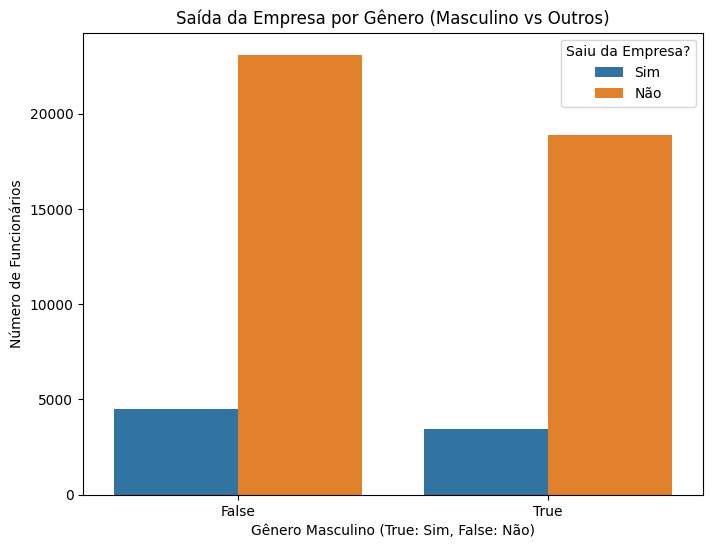

In [28]:
# Análise de Saída da Empresa por Gênero

plt.figure(figsize=(8, 6))
sns.countplot(data=df_funcionarios, x='Genero_Masculino', hue='Saiu da Empresa?')
plt.title('Saída da Empresa por Gênero (Masculino vs Outros)')
plt.xlabel('Gênero Masculino (True: Sim, False: Não)')
plt.ylabel('Número de Funcionários')
plt.show()

In [29]:
# Plotly (interativo)
fig = px.histogram(df_funcionarios, x='Departamento', color='Saiu da Empresa?', title='Saída da Empresa por Departamento')
fig.show()


In [30]:
df_funcionarios.to_csv("dados_funcionarios.csv", index=False)

In [194]:
print("\nDataFrame final após tratamento:")
df_funcionarios.info()
print(df_funcionarios.head())


DataFrame final após tratamento:
<class 'pandas.core.frame.DataFrame'>
Index: 49950 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ID Funcionário                             49950 non-null  int64   
 1   Idade                                      49950 non-null  float64 
 2   Estado Civil                               49950 non-null  object  
 3   Escolaridade                               49950 non-null  object  
 4   Cor/Raça                                   49950 non-null  object  
 5   Filhos                                     49950 non-null  object  
 6   Nacionalidade                              49950 non-null  object  
 7   Naturalidade                               49950 non-null  object  
 8   Tipo de Moradia                            49950 non-null  object  
 9   PCD                                        49950 non-n